 # Prediction of App Ratings

## Team Members
### Shreya - 46192046
### Venkata sai kiran.D  - 46192054
### Malla Satish Kumar - 46191919
### Allam Sai Krishna - 46191268
### Bindushree S - 46192055 
### Hrythm Munjal - 46191270 

The dataset chosen for this project was from the popular data website Kaggle. 

It contains over 10k application data, capturing various details like category, reviews, installs, size, etc. The aim of the project was to first generally visualize the distribution of the dataset across categories, identify correlations among the parameters.

To then find an accurate machine learning model which could fairly accurately predict user ratings on any app when similar data is available.

Seaborn & Matplotlib libraries of python were used to perform visualizations on python. Subsequently, four different machine learning models were used and trained on this data

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\krishna\Downloads\googleplaystore.csv")

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


* App: Application name
* Category: Category the app belongs to
* Rating: Overall user rating of the app (as when scraped)
* Reviews: Number of user reviews for the app (as when scraped)
* Size: Size of the app (as when scraped)
* Installs: Number of user downloads/installs for the app (as when scraped)
* Type: Paid or Free
* Price: Price of the app (as when scraped)
* Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
* Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
* Last Updated: Date when the app was last updated on Play Store (as when scraped)
* Current Ver: Current version of the app available on Play Store (as when scraped)
* Android Ver: Min required Android version (as when scraped)

### Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
data.describe(include=['object', 'float', 'int'])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2784,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,3-Aug-18,Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(10841, 13)

In [7]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
for i in data.columns:
    print('{} has {} % missing values'.format(i,np.round(data[i].isnull().sum()/len(data)*100,3)))

App has 0.0 % missing values
Category has 0.0 % missing values
Rating has 13.597 % missing values
Reviews has 0.0 % missing values
Size has 0.0 % missing values
Installs has 0.0 % missing values
Type has 0.009 % missing values
Price has 0.0 % missing values
Content Rating has 0.009 % missing values
Genres has 0.0 % missing values
Last Updated has 0.0 % missing values
Current Ver has 0.074 % missing values
Android Ver has 0.028 % missing values


In [9]:
def printinfo():
    temp = pd.DataFrame(index=data.columns)
    temp['data_type'] = data.dtypes
    temp['null_count'] = data.isnull().sum()
    temp['unique_count'] = data.nunique()
    return temp

In [10]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


We have some useful information about the dataset. i.e., we can now see the missing number of values of any attribute, its unique count, and its respective data types.

## Data Cleaning

Now we can start the process of data cleaning, lets start with the column Type:

In [11]:
data[data.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,28-Jun-18,Varies with device,Varies with device


Since there is only one missing value in this column, So, let’s fill the missing value. After cross-checking in the play store the missing value is found to be Free, So now we can fill the missing value with free .

In [12]:
data['Type'].fillna("Free", inplace = True)

In [13]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Now, we can move on to the column Content Rating :

In [14]:
data[data['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [15]:
# data.loc[10468:10477, :]

In [16]:
data.dropna(subset = ['Content Rating'], inplace=True)

In [17]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,1474,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


We are having some of the unwanted columns which will be of not much use in the analysis process. So let’s drop those columns.

data.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

Now, we can fix the Rating column which contains a total of 1474 of missing values. Replacing the missing values with the Modevalue of that entire column

In [18]:
modeValueRating = data['Rating'].mode()

In [19]:
data['Rating'].fillna(value=modeValueRating[0], inplace = True)

Finally, after fixing all the missing values, we should have a look at our data frame, We defined a function as printinfo() . So, it’s time to use that function.

In [20]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [21]:
data.shape

(10840, 13)

In [22]:
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up


Columns like Reviews, Size, Installs, & priceshould have an intor floatdatatype, But here we can see of objecttype, So let’s convert them to their respective correct type.

Starting with the column Reviews , converting its type to int .

In [23]:
data['Reviews'] = data.Reviews.astype(int)

In [24]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


(Now Size column)
Converting the Size Column from object to integer, but this column contains some of the special characters like , , + , M , K & also it has a some of the value as Varies with device . We need to remove all of these and then convert it to int or float .

Removing the +Symbol:

In [25]:
data['Size'] = data.Size.apply(lambda x: x.strip('+'))# Removing the + Sign

Removing the , symbol:

In [26]:
data['Size'] =data.Size.apply(lambda x: x.replace(',', ''))# For removing the `,`

Replacing the M symbol by multiplying the value with 1000000:

In [27]:
data['Size'] = data.Size.apply(lambda x: x.replace('M', 'e+6'))# For converting the M to Mega

Replacing the k by multiplying the value with 1000:

In [28]:
data['Size'] =data.Size.apply(lambda x: x.replace('k', 'e+3'))# For convertinf the K to Kilo

Replacing the Varies with device value with Nan :

In [29]:
data['Size'] = data.Size.replace('Varies with device', np.NaN)

Now, finally converting all these values to numeric type:



In [30]:
data['Size'] = pd.to_numeric(data['Size']) # Converting the string to Numeric type

In [31]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,6001
Size,float64,1695,459
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [32]:
data.dropna(subset = ['Size'], inplace=True)

Column: Installs :
To convert this column from object to integer type. First of all, we will need to remove the +symbol from these values.

In [33]:
data['Installs'] = data.Installs.apply(lambda x: x.strip('+'))

In [34]:
data['Installs'] = data.Installs.apply(lambda x: x.replace(',', ''))

Lastly, we can now convert it from string type to numeric type, and then have a look at our dataset.

In [35]:
data['Installs'] = pd.to_numeric(data['Installs'])

In [36]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


 now we are only left with the Price column.
Column: Price :
Converting this column from objectto Numeric type.

In [37]:
data['Price'].value_counts()

0           8421
$0.99        145
$2.99        114
$1.99         66
$4.99         65
            ... 
$1.59          1
$1.50          1
$89.99         1
$3.04          1
$299.99        1
Name: Price, Length: 87, dtype: int64

The values contain a special symbol $ which can be removed and then converted to the numeric type.

In [38]:
data['Price'] = data.Price.apply(lambda x: x.strip('$'))

In [39]:
data['Price'] = pd.to_numeric(data['Price'])

In [40]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


Finally Data Preparation and Cleaning Completed

In [41]:
data[data['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [42]:
data['Rating'].max()

5.0

In [43]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [44]:
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up


In [45]:
data["Last Updated"] = pd.to_datetime(data['Last Updated'])
data['year_added']=data['Last Updated'].dt.year
data['month_added']=data['Last Updated'].dt.month

In [46]:
df=data[:]

In [47]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6


Here we added 2 more columns in the data set by spliting the last updated attribute, by doing this we find that in which year apps are added or updated on playstore.

## Data Visualization

In [48]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'year_added', 'month_added'],
      dtype='object')

### Type of Application (Paid OR Free)

In [49]:
grouped = data["Type"].value_counts().reset_index()
grouped=grouped.rename(columns={'index':'Type','Type':'Count'})
grouped

,Type,Count
0,Free,8421
1,Paid,724


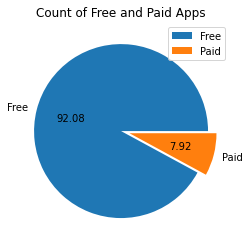

In [50]:
fig=plt.pie(grouped['Count'],labels=grouped['Type'],autopct="%.2f",explode=[0,0.1])
plt.title("Count of Free and Paid Apps")
plt.legend()
plt.show()

Here we see that 92.08% apps are freee and 7.92% apps are paid on google playstore. so we say that Most of the people love free services

### App updated or added over the years

In [51]:
d1=data[data['Type']=='Free']
d1.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1


In [52]:
d2=data[data['Type']=='Paid']
d2.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800000.0,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,2018,3


In [53]:
d1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6


In [54]:
free_year=d1['year_added'].value_counts().reset_index()
#print(free_year)
free_year=free_year.rename(columns={"index":"year_added","year_added":"count"})
free_year

,year_added,count
0,2018,5567
1,2017,1575
2,2016,660
3,2015,365
4,2014,144
5,2013,77
6,2012,20
7,2011,12
8,2010,1


In [55]:
paid_year=d2['year_added'].value_counts().reset_index()
#print(paid_year)
paid_year=paid_year.rename(columns={"index":"year_added","year_added":"count"})
paid_year

,year_added,count
0,2018,301
1,2017,163
2,2016,89
3,2015,78
4,2014,57
5,2013,28
6,2012,5
7,2011,3


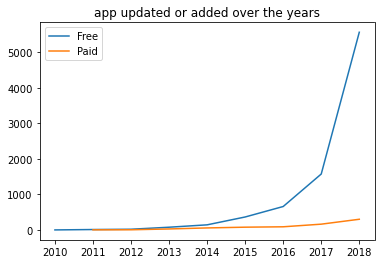

In [56]:
plt.plot(free_year['year_added'],free_year['count'],label="Free")
plt.plot(paid_year['year_added'],paid_year['count'],label="Paid")
plt.legend()
plt.title("app updated or added over the years")
plt.show()

 In the above plot we plot the app updated or added over the year Free vs Paid. By observing this plot we conclude that before 2011 there were no paid apps.But with the year free apps are added in huge amount in comparision to paid apps. We can conclude that people like free service more than paid service.

### Content Ratings of the free vs paid app

In [57]:
free_content=d1["Content Rating"].value_counts().reset_index()
free_content=free_content.rename(columns={"index":"Content Rating","Content Rating":"Count"})
free_content

,Content Rating,Count
0,Everyone,6790
1,Teen,936
2,Mature 17+,389
3,Everyone 10+,302
4,Unrated,2
5,Adults only 18+,2


In [58]:
paid_content=d2["Content Rating"].value_counts().reset_index()
paid_content=paid_content.rename(columns={"index":"Content Rating","Content Rating":"Count"})
paid_content

,Content Rating,Count
0,Everyone,626
1,Teen,51
2,Everyone 10+,30
3,Mature 17+,17


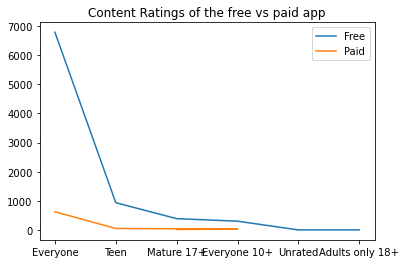

In [59]:
plt.plot(free_content["Content Rating"],free_content['Count'],label="Free")
plt.plot(paid_content["Content Rating"],paid_content['Count'],label="Paid")
plt.title("Content Ratings of the free vs paid app")
plt.legend()
plt.show()

In [60]:
category=d1["Category"].value_counts().reset_index()
category=category.rename(columns={"index":"Category","Category":"Count"})
category

,Category,Count
0,FAMILY,1654
1,GAME,936
2,TOOLS,670
3,BUSINESS,387
4,MEDICAL,336
5,LIFESTYLE,328
6,FINANCE,290
7,SPORTS,289
8,PRODUCTIVITY,279
9,PERSONALIZATION,276


In [61]:
category1=d2["Category"].value_counts().reset_index()
category1=category1.rename(columns={"index":"Category","Category":"Count"})
category1

,Category,Count
0,FAMILY,178
1,MEDICAL,98
2,PERSONALIZATION,79
3,GAME,79
4,TOOLS,69
5,BOOKS_AND_REFERENCE,27
6,PRODUCTIVITY,24
7,COMMUNICATION,23
8,SPORTS,22
9,PHOTOGRAPHY,19


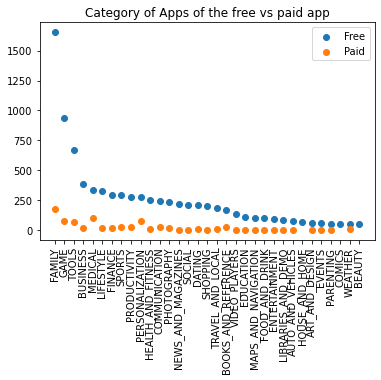

In [62]:
plt.scatter(category["Category"],category['Count'],label="Free")
plt.scatter(category1["Category"],category1['Count'],label="Paid")
plt.title("Category of Apps of the free vs paid app")
plt.xticks(rotation=90)
plt.legend()
plt.show()

The above plot shows that most of the app content rating are for everyone and most of them are Free.

## what are the top categories in the play store, which contains the highest number of apps?

In [63]:
y = data['Category'].value_counts().index
x = data['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

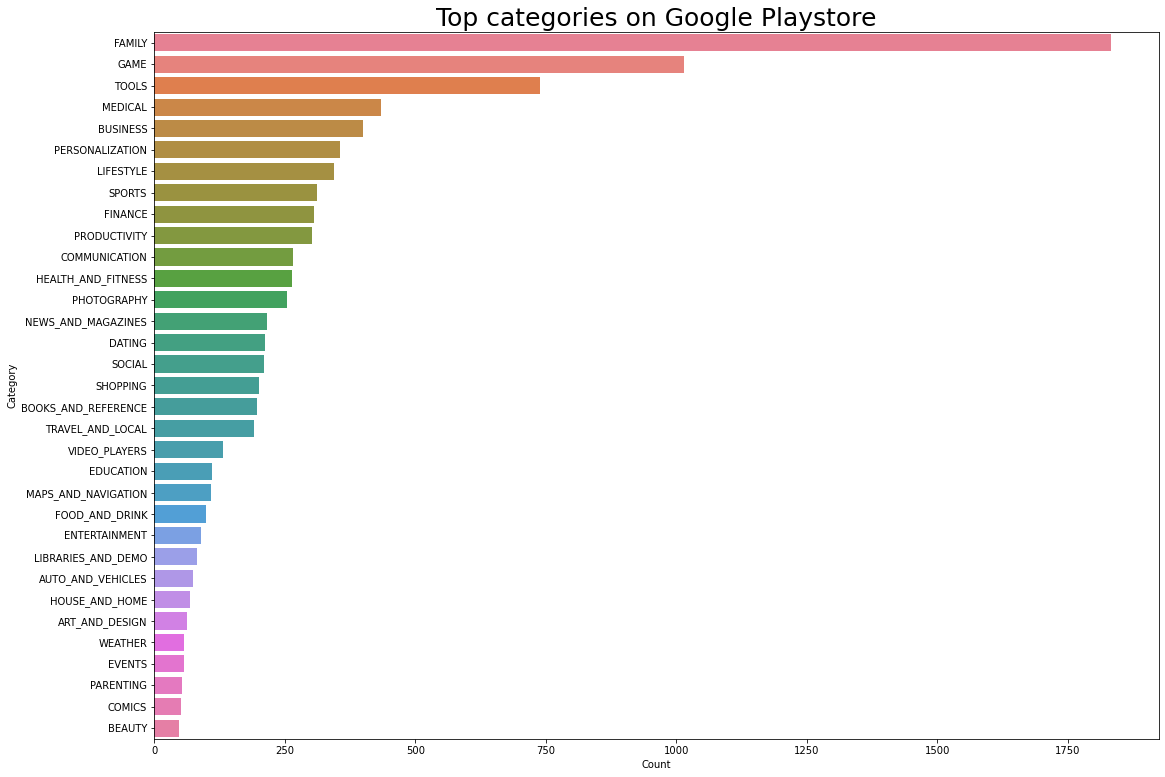

In [64]:
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Top categories on Google Playstore", fontsize = 25);

So there are all total of 33 categories in the dataset from the above output we can come to the conclusion that in the play store most of the apps are under Family & Game category and least are of Beauty & Comics Category.

## Which category of Apps from the ‘Content Rating’ column is found more on the play store?

In [65]:
x2 = data['Content Rating'].value_counts().index
y2 = data['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

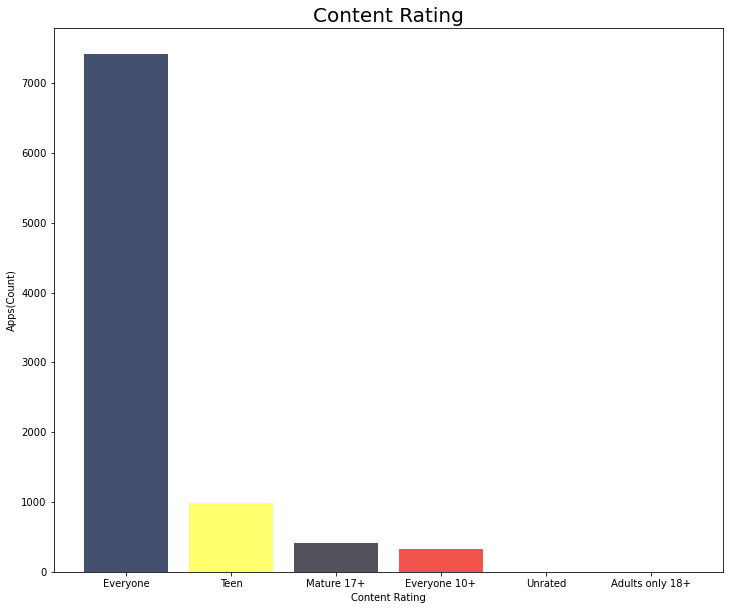

In [66]:
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

From the above plot, we can see that the Everyone category has the highest number of apps.

 ## distribution of the ratings of the data frame.

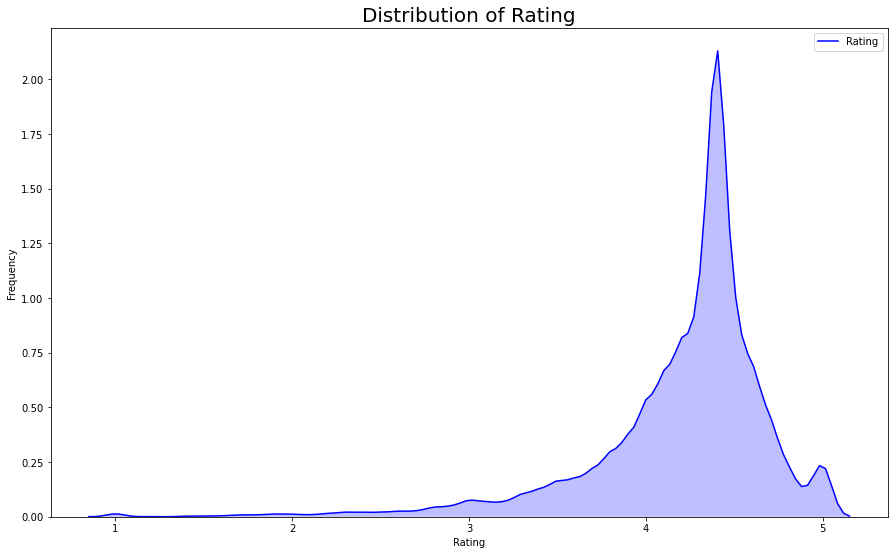

In [67]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(data.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

From the above graph, we can come to the conclusion that most of the apps in the google play store are rated between 3.5 to 4.8.

### Data Preparation

In [68]:
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1


In [69]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


New

We are having some of the unwanted columns which will be of not much use in the analysis process. So let’s drop those columns.

In [70]:
data.drop(['App','Size','Price','Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

In [71]:
df=data.copy()

In [72]:
df.head()

,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,year_added,month_added
0,ART_AND_DESIGN,4.1,159,10000,Free,Everyone,Art & Design,2018,1
1,ART_AND_DESIGN,3.9,967,500000,Free,Everyone,Art & Design;Pretend Play,2018,1
2,ART_AND_DESIGN,4.7,87510,5000000,Free,Everyone,Art & Design,2018,8
3,ART_AND_DESIGN,4.5,215644,50000000,Free,Teen,Art & Design,2018,6
4,ART_AND_DESIGN,4.3,967,100000,Free,Everyone,Art & Design;Creativity,2018,6


In [73]:
print(df['Category'].unique())
print(df['Category'].nunique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
33


In [74]:
print(df['Content Rating'].unique())
print(df['Content Rating'].nunique())

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']
6


In [75]:
print(df['Genres'].unique())
print(df['Genres'].nunique())

['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education' 'Education;Creativity'
 'Education;Education' 'Education;Action & Adventure'
 'Education;Pretend Play' 'Education;Brain Games' 'Entertainment'
 'Entertainment;Brain Games' 'Entertainment;Music & Video' 'Events'
 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Lifestyle;Pretend Play'
 'Adventure;Action & Adventure' 'Arcade' 'Casual' 'Card'
 'Casual;Pretend Play' 'Strategy' 'Action' 'Puzzle' 'Sports' 'Word'
 'Racing' 'Casual;Creativity' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle;Brain Games' 'Educational;Education'
 'Card;Brain Games' 'Educational;Brain Games' 'Educa

In [76]:
l=[]
for i in df['Genres']:
  if i not in l:
     l.append(i)
print(l)
len(l)

['Art & Design', 'Art & Design;Pretend Play', 'Art & Design;Creativity', 'Art & Design;Action & Adventure', 'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business', 'Comics', 'Comics;Creativity', 'Communication', 'Dating', 'Education', 'Education;Creativity', 'Education;Education', 'Education;Action & Adventure', 'Education;Pretend Play', 'Education;Brain Games', 'Entertainment', 'Entertainment;Brain Games', 'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink', 'Health & Fitness', 'House & Home', 'Libraries & Demo', 'Lifestyle', 'Lifestyle;Pretend Play', 'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card', 'Casual;Pretend Play', 'Strategy', 'Action', 'Puzzle', 'Sports', 'Word', 'Racing', 'Casual;Creativity', 'Simulation', 'Adventure', 'Board', 'Trivia', 'Role Playing', 'Simulation;Education', 'Action;Action & Adventure', 'Casual;Brain Games', 'Simulation;Action & Adventure', 'Educational;Creativity', 'Puzzle;Brain Games', 'Educational;Education', 'Card;Brain G

116

In [77]:
printinfo()

,data_type,null_count,unique_count
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,4680
Installs,int64,0,20
Type,object,0,2
Content Rating,object,0,6
Genres,object,0,116
year_added,int64,0,9
month_added,int64,0,12


### Converting Numerical data into Categorical data

In [78]:
'''data['Category']=data.Category.astype("category").cat.codes
data['Type']=data.Type.astype("category").cat.codes
data['Genres']=data.Genres.astype("category").cat.codes
data=data.rename(columns={"Content Rating":"Content"})
data['Content']=data.Content.astype("category").cat.codes
data['Installs']=data.Installs.astype("category").cat.codes'''


'data[\'Category\']=data.Category.astype("category").cat.codes\ndata[\'Type\']=data.Type.astype("category").cat.codes\ndata[\'Genres\']=data.Genres.astype("category").cat.codes\ndata=data.rename(columns={"Content Rating":"Content"})\ndata[\'Content\']=data.Content.astype("category").cat.codes\ndata[\'Installs\']=data.Installs.astype("category").cat.codes'

In [79]:
data

,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,year_added,month_added
0,ART_AND_DESIGN,4.1,159,10000,Free,Everyone,Art & Design,2018,1
1,ART_AND_DESIGN,3.9,967,500000,Free,Everyone,Art & Design;Pretend Play,2018,1
2,ART_AND_DESIGN,4.7,87510,5000000,Free,Everyone,Art & Design,2018,8
3,ART_AND_DESIGN,4.5,215644,50000000,Free,Teen,Art & Design,2018,6
4,ART_AND_DESIGN,4.3,967,100000,Free,Everyone,Art & Design;Creativity,2018,6
...,...,...,...,...,...,...,...,...,...
10835,BUSINESS,4.4,0,10,Free,Everyone,Business,2016,9
10836,FAMILY,4.5,38,5000,Free,Everyone,Education,2017,7
10837,FAMILY,5.0,4,100,Free,Everyone,Education,2018,7
10838,MEDICAL,4.4,3,1000,Free,Everyone,Medical,2017,1


In [80]:
final_df=data.copy()

In [81]:
final_df

,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,year_added,month_added
0,ART_AND_DESIGN,4.1,159,10000,Free,Everyone,Art & Design,2018,1
1,ART_AND_DESIGN,3.9,967,500000,Free,Everyone,Art & Design;Pretend Play,2018,1
2,ART_AND_DESIGN,4.7,87510,5000000,Free,Everyone,Art & Design,2018,8
3,ART_AND_DESIGN,4.5,215644,50000000,Free,Teen,Art & Design,2018,6
4,ART_AND_DESIGN,4.3,967,100000,Free,Everyone,Art & Design;Creativity,2018,6
...,...,...,...,...,...,...,...,...,...
10835,BUSINESS,4.4,0,10,Free,Everyone,Business,2016,9
10836,FAMILY,4.5,38,5000,Free,Everyone,Education,2017,7
10837,FAMILY,5.0,4,100,Free,Everyone,Education,2018,7
10838,MEDICAL,4.4,3,1000,Free,Everyone,Medical,2017,1


In [82]:
!pip install category_encoders

In [83]:
import category_encoders as ce
import pandas as pd



#Create object for binary encoding
encoder= ce.BinaryEncoder(cols=['Category','Type','Content Rating','Genres'],return_df=True)

#Original Data
data

,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,year_added,month_added
0,ART_AND_DESIGN,4.1,159,10000,Free,Everyone,Art & Design,2018,1
1,ART_AND_DESIGN,3.9,967,500000,Free,Everyone,Art & Design;Pretend Play,2018,1
2,ART_AND_DESIGN,4.7,87510,5000000,Free,Everyone,Art & Design,2018,8
3,ART_AND_DESIGN,4.5,215644,50000000,Free,Teen,Art & Design,2018,6
4,ART_AND_DESIGN,4.3,967,100000,Free,Everyone,Art & Design;Creativity,2018,6
...,...,...,...,...,...,...,...,...,...
10835,BUSINESS,4.4,0,10,Free,Everyone,Business,2016,9
10836,FAMILY,4.5,38,5000,Free,Everyone,Education,2017,7
10837,FAMILY,5.0,4,100,Free,Everyone,Education,2018,7
10838,MEDICAL,4.4,3,1000,Free,Everyone,Medical,2017,1


In [84]:
#Fit and Transform Data 
data_encoded=encoder.fit_transform(data) 
data_encoded


,Category_0,Category_1,Category_2,Category_3,Category_4,Category_5,Rating,Reviews,Installs,Type_0,...,Content Rating_2,Genres_0,Genres_1,Genres_2,Genres_3,Genres_4,Genres_5,Genres_6,year_added,month_added
0,0,0,0,0,0,1,4.1,159,10000,0,...,1,0,0,0,0,0,0,1,2018,1
1,0,0,0,0,0,1,3.9,967,500000,0,...,1,0,0,0,0,0,1,0,2018,1
2,0,0,0,0,0,1,4.7,87510,5000000,0,...,1,0,0,0,0,0,0,1,2018,8
3,0,0,0,0,0,1,4.5,215644,50000000,0,...,0,0,0,0,0,0,0,1,2018,6
4,0,0,0,0,0,1,4.3,967,100000,0,...,1,0,0,0,0,0,1,1,2018,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,0,0,0,1,0,1,4.4,0,10,0,...,1,0,0,0,1,0,0,0,2016,9
10836,0,1,0,0,1,1,4.5,38,5000,0,...,1,0,0,0,1,1,0,1,2017,7
10837,0,1,0,0,1,1,5.0,4,100,0,...,1,0,0,0,1,1,0,1,2018,7
10838,0,1,0,1,0,0,4.4,3,1000,0,...,1,1,0,1,0,0,1,1,2017,1


In [85]:
data_encoded.columns

Index(['Category_0', 'Category_1', 'Category_2', 'Category_3', 'Category_4',
       'Category_5', 'Rating', 'Reviews', 'Installs', 'Type_0', 'Type_1',
       'Content Rating_0', 'Content Rating_1', 'Content Rating_2', 'Genres_0',
       'Genres_1', 'Genres_2', 'Genres_3', 'Genres_4', 'Genres_5', 'Genres_6',
       'year_added', 'month_added'],
      dtype='object')

In [86]:
data=data_encoded.copy()

### Feature selection

In [87]:
X=data.drop('Rating',axis=1)
X.head(3)

,Category_0,Category_1,Category_2,Category_3,Category_4,Category_5,Reviews,Installs,Type_0,Type_1,...,Content Rating_2,Genres_0,Genres_1,Genres_2,Genres_3,Genres_4,Genres_5,Genres_6,year_added,month_added
0,0,0,0,0,0,1,159,10000,0,1,...,1,0,0,0,0,0,0,1,2018,1
1,0,0,0,0,0,1,967,500000,0,1,...,1,0,0,0,0,0,1,0,2018,1
2,0,0,0,0,0,1,87510,5000000,0,1,...,1,0,0,0,0,0,0,1,2018,8


In [88]:
y=data['Rating'].values
y=y.astype('int')
y

array([4, 3, 4, ..., 5, 4, 4])

### Training & Testing of Model

### Spliting the 80% of the dataset into train_data and 20% of the dataset into test_data

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [90]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6401, 22)
(6401,)
(2744, 22)
(2744,)


In [91]:
X_train

,Category_0,Category_1,Category_2,Category_3,Category_4,Category_5,Reviews,Installs,Type_0,Type_1,...,Content Rating_2,Genres_0,Genres_1,Genres_2,Genres_3,Genres_4,Genres_5,Genres_6,year_added,month_added
7525,0,1,0,0,1,1,488039,10000000,0,1,...,0,0,1,0,0,0,1,1,2017,11
854,0,0,1,0,0,1,3528,100000,1,0,...,1,0,0,1,0,0,0,1,2018,6
1839,0,1,0,0,1,0,9394,100000,1,0,...,1,0,1,0,0,1,0,1,2017,11
10700,0,0,0,1,1,1,4,1000,0,1,...,1,0,0,0,1,0,1,1,2018,1
7224,0,1,1,0,1,0,0,50,0,1,...,1,1,0,1,1,0,0,1,2018,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7157,1,0,0,0,0,0,6,100,0,1,...,1,1,1,0,0,0,1,0,2017,10
6575,0,1,0,0,1,1,70903,5000000,0,1,...,1,0,1,1,0,1,0,0,2018,5
6793,0,1,1,0,1,0,4,500,0,1,...,1,1,0,1,1,0,0,1,2018,5
1170,0,0,1,1,0,0,24729,1000000,0,1,...,1,0,0,1,0,1,1,1,2018,8


In [92]:
X_test

,Category_0,Category_1,Category_2,Category_3,Category_4,Category_5,Reviews,Installs,Type_0,Type_1,...,Content Rating_2,Genres_0,Genres_1,Genres_2,Genres_3,Genres_4,Genres_5,Genres_6,year_added,month_added
2686,0,1,0,1,1,0,171584,10000000,0,1,...,1,1,0,1,0,1,0,1,2018,7
8538,0,1,1,1,1,1,24565,1000000,0,1,...,1,1,1,0,0,0,0,1,2016,3
957,0,0,1,0,1,0,8674,1000000,0,1,...,0,0,0,1,0,0,1,1,2018,5
6830,0,1,0,0,1,1,38,1000,0,1,...,1,0,0,0,1,1,0,1,2017,9
3328,0,1,1,0,1,0,1107320,50000000,0,1,...,1,1,0,1,1,0,0,1,2018,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,1,0,0,0,0,0,78154,1000000,0,1,...,1,1,1,0,0,0,1,0,2018,8
7814,0,0,0,1,1,1,25,1000,0,1,...,1,0,0,0,1,0,1,1,2017,2
409,0,0,0,1,1,1,15880,1000000,0,1,...,1,0,0,0,1,0,1,1,2018,8
3496,0,1,1,1,0,0,212,1000000,0,1,...,1,1,0,1,1,0,1,1,2018,4


In [93]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeRegressor # Decision tree algorithm
from sklearn.neighbors import KNeighborsRegressor # KNN algorithm

from xgboost import XGBRegressor # XGBoost algorithm
from sklearn.ensemble import RandomForestRegressor

In [94]:
#Linear Regression

regressor =LinearRegression()
regressor.fit(X_train, y_train)
lr_yhat = regressor.predict(X_test)

In [95]:
# 1. Decision Tree

tree_model = DecisionTreeRegressor(max_depth = 6, criterion = 'mse')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

In [96]:
# K-Nearest Neighbors
n = 15

knn = KNeighborsRegressor(n_neighbors = n) 
knn.fit(X_train, y_train) 
knn_yhat = knn.predict(X_test)

In [97]:
#random forest regressor
model = RandomForestRegressor(n_jobs=-1)
estimators = np.arange(10,200,10)
scores=[]
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train,y_train)
    scores.append(model.score(X_test,y_test))

#plt.figure(figsize=(7,5))
#plt.title("effect of estimators")
#plt.xlabel("no.of estimators")
#plt.ylabel("score")
#plt.plot(estimators,scores)

#results=list(zip(estimators,scores))
#results

In [98]:
model = RandomForestRegressor(n_jobs=-1)
estimators = 190
#scores=[]
model.set_params(n_estimators=n)
model.fit(X_train,y_train)
#scores.append(model.score(X_test,y_test))
model_yhat = model.predict(X_test)


model.score()

In [99]:
y_test

array([4, 4, 3, ..., 4, 4, 4])

In [100]:
from sklearn.metrics import mean_absolute_error
print("Mean absolute error of the linear regression is",mean_absolute_error(y_test,lr_yhat))
print("Mean absolute error of the Decision tree is",mean_absolute_error(y_test,tree_yhat))
print("Mean absolute error of the KNN is",mean_absolute_error(y_test,knn_yhat))
print("Mean absolute error of the Random Forest Regressor is",mean_absolute_error(y_test,model_yhat))

Mean absolute error of the linear regression is 0.377607804556337
Mean absolute error of the Decision tree is 0.36725558884991244
Mean absolute error of the KNN is 0.35612244897959183
Mean absolute error of the Random Forest Regressor is 0.35366036492470243


In [101]:
from sklearn.metrics import mean_squared_error
print("Mean squared error of the linear regression is ",mean_squared_error(y_test,lr_yhat))
print("Mean squared error of the Decision Tree is ",mean_squared_error(y_test,tree_yhat))
print("Mean squared error of the KNN is ",mean_squared_error(y_test,knn_yhat))
print("Mean squared error of the Random Forest Regressor is ",mean_squared_error(y_test,model_yhat))

Mean squared error of the linear regression is  0.2954317002836223
Mean squared error of the Decision Tree is  0.29955433502562934
Mean squared error of the KNN is  0.2806608357628766
Mean squared error of the Random Forest Regressor is  0.284949212887829


In [102]:
from sklearn.metrics import mean_squared_error
print("Root Mean squared error of the linear regressione is ",np.sqrt(mean_squared_error(y_test,lr_yhat)))
print("Root Mean squared error of the Decision Tree is ",np.sqrt(mean_squared_error(y_test,tree_yhat)))
print("Root Mean squared error of the KNN is ",np.sqrt(mean_squared_error(y_test,knn_yhat)))
print("Root Mean squared error of the Random Forest Regressor is ",np.sqrt(mean_squared_error(y_test,model_yhat)))
#print("root Mean squared error of the Random Forest Regressor is",np.sqrt(mean_squared_error(y_test,model_yhat)))

Root Mean squared error of the linear regressione is  0.543536291597555
Root Mean squared error of the Decision Tree is  0.5473155717003029
Root Mean squared error of the KNN is  0.529774325314918
Root Mean squared error of the Random Forest Regressor is  0.5338063439936144


In [103]:
from sklearn.metrics import r2_score
print("R SQUARED (R2) of the linear regression  is",r2_score(y_test,lr_yhat))
print("R SQUARED (R2) of the Decision tree  is",r2_score(y_test,tree_yhat))
print("R SQUARED (R2) of the KNN is",r2_score(y_test,knn_yhat))
print("R SQUARED (R2) of the Random Forest Regressor is",r2_score(y_test,model_yhat))

R SQUARED (R2) of the linear regression  is 0.005994683882933671
R SQUARED (R2) of the Decision tree  is -0.007876274602664823
R SQUARED (R2) of the KNN is 0.05569252552677484
R SQUARED (R2) of the Random Forest Regressor is 0.041263912566062655


In [104]:
final={}
d_category={}

for i in range(len(df.Category)):
  d_category[df['Category'].iloc[i]]=str(data['Category_0'].iloc[i])+str(data['Category_1'].iloc[i])+str(data['Category_2'].iloc[i])+str(data['Category_3'].iloc[i])+str(data['Category_4'].iloc[i])+str(data['Category_5'].iloc[i])

d_category
final['Category']=d_category

In [105]:
d_type={}
for i in range(len(df.Type)):
  d_type[df['Type'].iloc[i]]=str(data['Type_0'].iloc[i])+str(data['Type_1'].iloc[i])

final['Type']=d_type

In [106]:
d_content_rating={}
for i in range(len(df['Content Rating'])):
  d_content_rating[df['Content Rating'].iloc[i]]=str(data['Content Rating_0'].iloc[i])+str(data['Content Rating_1'].iloc[i])+str(data['Content Rating_2'].iloc[i])


final['Content Rating']=d_content_rating

In [107]:
d_genres={}
for i in range(len(df['Genres'])):
  d_genres[df['Genres'].iloc[i]]=str(data['Genres_0'].iloc[i])+str(data['Genres_1'].iloc[i])+str(data['Genres_2'].iloc[i])+str(data['Genres_3'].iloc[i])+str(data['Genres_4'].iloc[i])+str(data['Genres_5'].iloc[i])+str(data['Genres_6'].iloc[i])


final['Genres']=d_genres


In [108]:
df1=df.copy()

In [109]:
df1.drop('Rating',axis=1,inplace=True)

In [110]:
df1.drop(['Reviews','Installs','year_added','month_added'],axis=1,inplace=True)

In [111]:
cols=df1.columns
columns=cols.tolist()


In [112]:
def fun(final,l):
  z=[]
  
  for i in range(8):
    if i==0:
      res=final['Category'][l[0]]
      for i in res:
        z.append(int(i))
    if i==1:
      z.append(l[1])
    if i==2:
      z.append(l[2])
    if i==3:
      res=final['Type'][l[3]]
      for i in res:
        z.append(int(i))
    if i==4:
      res=final['Content Rating'][l[4]]
      for i in res:
        z.append(int(i))
    if i==5:
      res=final['Genres'][l[5]]
      for i in res:
        z.append(int(i))
    if i==6:
      z.append(l[6])
    if i==7:
      z.append(l[7])

  return z



category=input("Enter the Category of the app\n")
reviews=int(input("no. of reviews\n"))
installs=int(input("no.of Installs\n"))
type=input("type of the app (free or paid)\n")
content_rating=input('Content rating of the app\n')
genres=input("genre of the app\n")
year_added=int(input("Year added \n"))
month_added = int(input("month added\n"))
l=[]
l.extend([category,reviews,installs,type,content_rating,genres,year_added,month_added])

z=fun(final,l)

print("############################################################################################")
print()
print()
print("The Rating of the App is",knn.predict([z]).tolist())
print()
print()

print("############################################################################################")

Enter the Category of the app
BEAUTY
no. of reviews
1000
no.of Installs
100000
type of the app (free or paid)
Free
Content rating of the app
Everyone
genre of the app
Art & Design
Year added 
2022
month added
6
############################################################################################


The Rating of the App is [3.6666666666666665]


############################################################################################


ART_AND_DESIGN	4.1	159	10000	Free	Everyone	Art & Design	2018	1

'BEAUTY', 4, 100, 'Free', 'Everyone', 'Art & Design\t', 2000, 3]

# The end